# پیش بینی قیمت خانه از طریق رگرسیون خطی ساده

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### توسط پاندا فایل دیتابیس خوانده میشود 

In [6]:
HouseDF = pd.read_csv('Tehran House price.csv')

In [7]:
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population,Avg. Area Number of Rooms,Address,Price
0,79545.45857,9,3,23086.80050,1,Shahran,1850000000
1,79248.64245,8,3,40173.07217,4,Shahran,1850000000
2,61287.06718,8,2,36882.15940,4,Pardis,550000000
3,63345.24005,8,1,34310.24283,3,Shahrake Qods,902500000
4,59982.19723,3,1,26354.10947,5,Shahrake Gharb,7000000000


In [8]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population,Avg. Area Number of Rooms,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.994800,3.017200,36163.516039,2.992800,5.593804e+09
std,10657.991214,1.991072,1.394307,9925.650114,1.418291,8.263756e+09
min,17796.631190,3.000000,1.000000,172.610686,1.000000,3.600000e+06
25%,61480.562390,4.000000,2.000000,29403.928700,2.000000,1.585000e+09
50%,68804.286405,6.000000,3.000000,36199.406690,3.000000,3.000000e+09
75%,75783.338665,8.000000,4.000000,42861.290770,4.000000,6.250000e+09
max,107701.748400,9.000000,5.000000,69621.713380,5.000000,9.240000e+10


In [9]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Bedrooms', 'Area Population',
       'Avg. Area Number of Rooms', 'Address', 'Price'],
      dtype='object')

C:\Users\No1\AppData\Local\Temp\ipykernel_10712\3588014427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HouseDF.corr(), annot=True)


<Axes: >

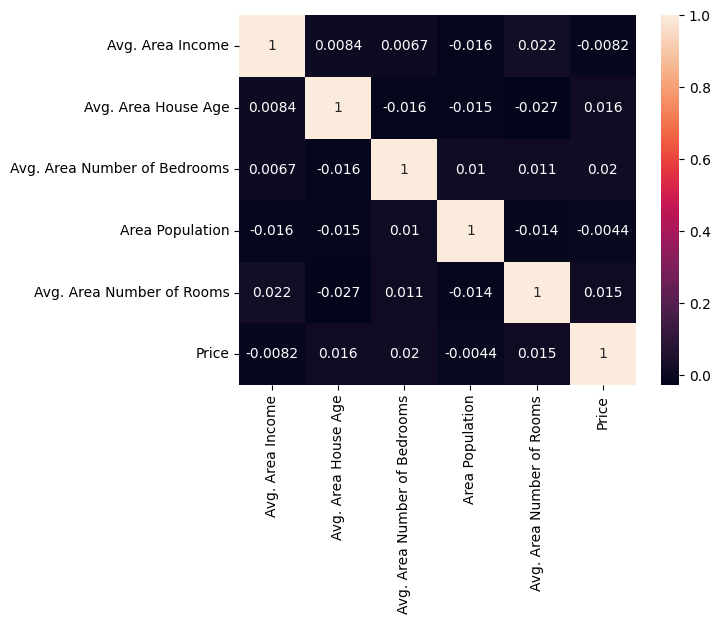

In [10]:
sns.heatmap(HouseDF.corr(), annot=True)

C:\Users\No1\AppData\Local\Temp\ipykernel_10712\4158129596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HouseDF['Price'])


<Axes: xlabel='Price', ylabel='Density'>

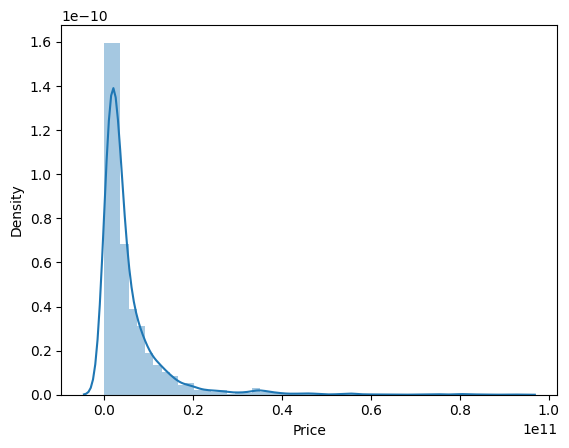

In [11]:
sns.distplot(HouseDF['Price'])

<Axes: ylabel='Avg. Area Income'>

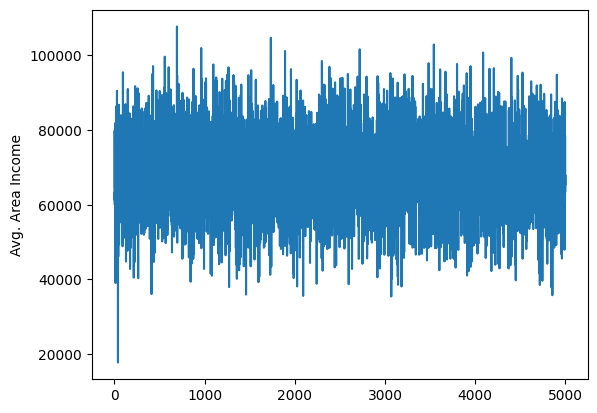

In [12]:
sns.lineplot(HouseDF['Avg. Area Income'])

## تمرین رگنسیون خطی و تعیین ابجکت هدف

### (price) تارگت هدف ما میباشد 

In [13]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']


### تقسیم بندی دیتا برای تمرین مدل

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## دریافت مدل رگرسیون خطی

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

4458449872.852143


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

## تشخیص از طریق رگرسیون خطی

In [21]:
predictions = lm.predict(X_test)

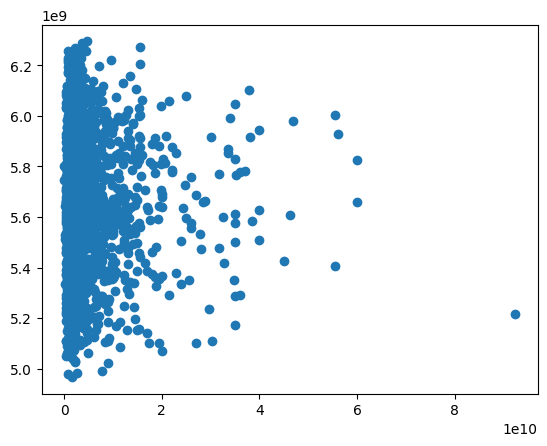

In [22]:
plt.scatter(y_test,predictions)

مدل بالا به دلیل پیوسته بودن از یک خط نشان میده مدل ما درست کار میکند

C:\Users\No1\AppData\Local\Temp\ipykernel_10712\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


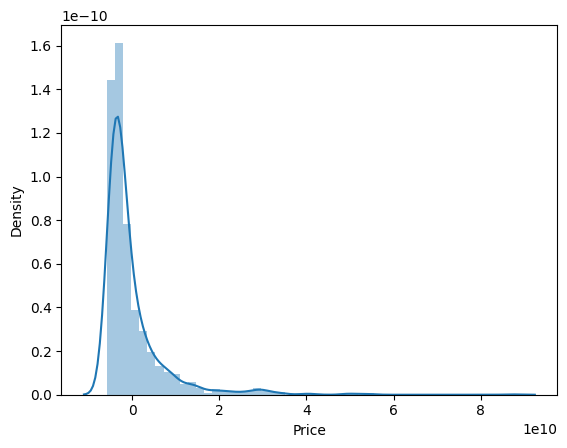

In [23]:
sns.distplot((y_test-predictions),bins=50);

یک مدل هیست که باز هم نشون دهنده درست تشخیص درست مدل ما میباشد

In [24]:
# ورودی از کاربر میگیرد و قیمت پیش بینی شده رو نمایش میدهد 

In [25]:
avg_area_income = float(input("لطفاً میانگین درآمد منطقه را وارد کنید: "))
avg_area_house_age = float(input("لطفاً میانگین سن خانه را وارد کنید: "))
avg_area_num_rooms = float(input("لطفاً میانگین تعداد اتاق‌ها را وارد کنید: "))
avg_area_num_bedrooms = float(input("لطفاً میانگین تعداد اتاق‌های خواب را وارد کنید: "))
area_population = float(input("لطفاً جمعیت منطقه را وارد کنید: "))

لطفاً میانگین درآمد منطقه را وارد کنید:  5000
لطفاً میانگین سن خانه را وارد کنید:  5
لطفاً میانگین تعداد اتاق‌ها را وارد کنید:  4
لطفاً میانگین تعداد اتاق‌های خواب را وارد کنید:  3
لطفاً جمعیت منطقه را وارد کنید:  2000


In [26]:
user_input = pd.DataFrame({'Avg. Area Income': [avg_area_income],
                            'Avg. Area House Age': [avg_area_house_age],
                            'Avg. Area Number of Rooms': [avg_area_num_rooms],
                            'Avg. Area Number of Bedrooms': [avg_area_num_bedrooms],
                            'Area Population': [area_population]})


In [27]:
predicted_price = lm.predict(user_input)

In [28]:
print("قیمت پیش‌بینی شده بر اساس اطلاعات وارد شده: $", predicted_price[0])

قیمت پیش‌بینی شده بر اساس اطلاعات وارد شده: $ 5546282555.889973
